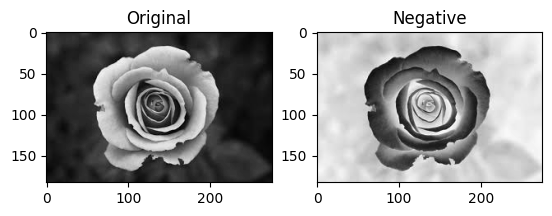

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('image.jpeg', cv2.IMREAD_GRAYSCALE)
negative = 255 - img

plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(negative, cmap='gray'), plt.title('Negative')
plt.show()

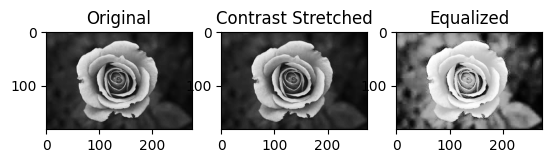

In [2]:
# Contrast Stretching
min_val, max_val = np.min(img), np.max(img)
contrast_stretched = (img - min_val) * (255 / (max_val - min_val))

# Histogram Equalization
equalized = cv2.equalizeHist(img)

# Display
plt.subplot(1, 3, 1), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(1, 3, 2), plt.imshow(contrast_stretched, cmap='gray'), plt.title('Contrast Stretched')
plt.subplot(1, 3, 3), plt.imshow(equalized, cmap='gray'), plt.title('Equalized')
plt.show()


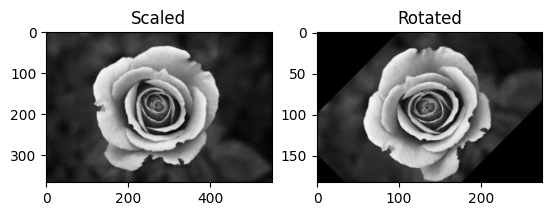

In [3]:
# Scaling
scaled_img = cv2.resize(img, None, fx=2, fy=2)

# Rotation
rows, cols = img.shape
M = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)
rotated_img = cv2.warpAffine(img, M, (cols, rows))

plt.subplot(1, 2, 1), plt.imshow(scaled_img, cmap='gray'), plt.title('Scaled')
plt.subplot(1, 2, 2), plt.imshow(rotated_img, cmap='gray'), plt.title('Rotated')
plt.show()


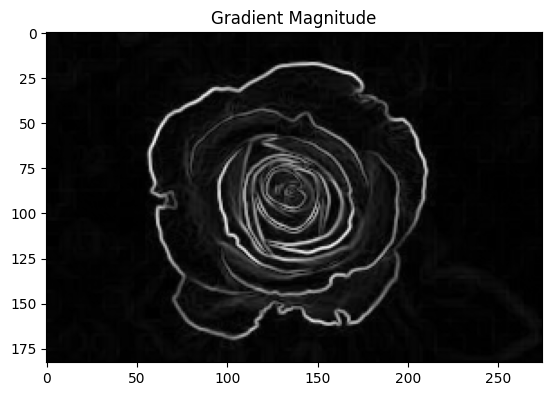

In [4]:
gx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
gy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
gradient = cv2.magnitude(gx, gy)

plt.imshow(gradient, cmap='gray'), plt.title('Gradient Magnitude')
plt.show()


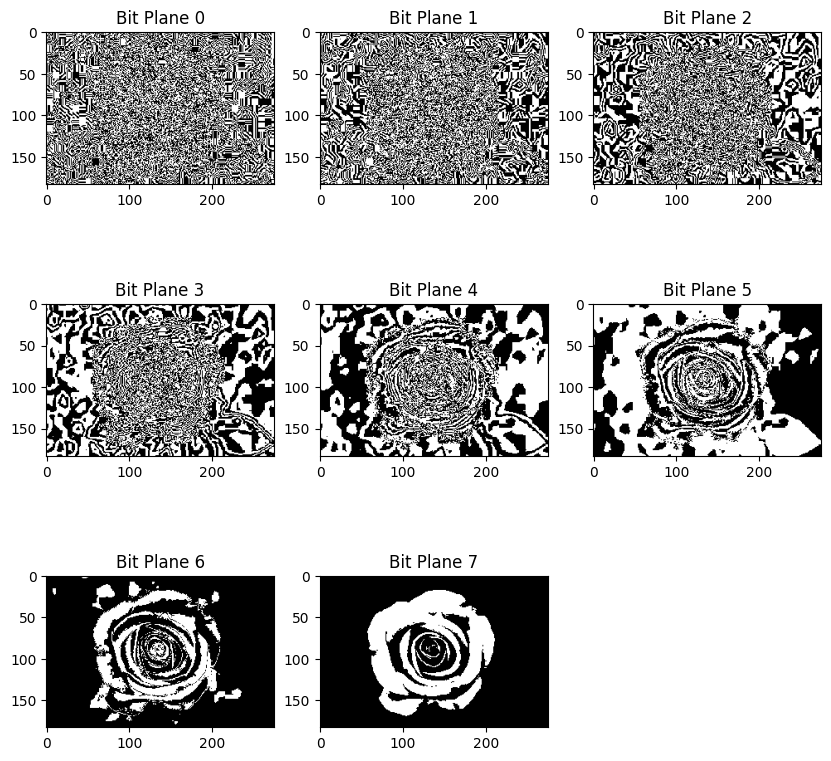

In [5]:
bit_planes = [(img >> i) & 1 for i in range(8)]
plt.figure(figsize=(10, 10))
for i, plane in enumerate(bit_planes):
    plt.subplot(3, 3, i + 1), plt.imshow(plane * 255, cmap='gray'), plt.title(f'Bit Plane {i}')
plt.show()

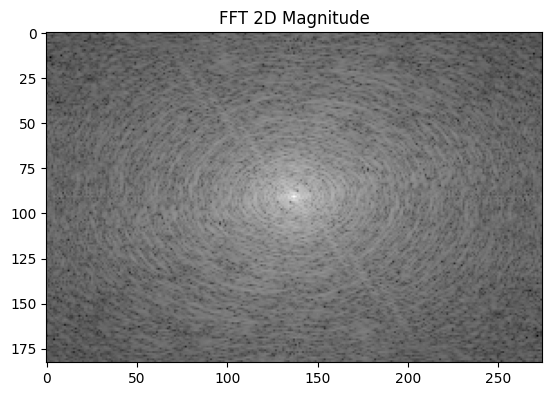

In [6]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift))

plt.imshow(magnitude_spectrum, cmap='gray'), plt.title('FFT 2D Magnitude')
plt.show()

In [7]:
mean, std_dev = np.mean(img), np.std(img)
corr_coef = np.corrcoef(img.flatten(), img.flatten())[0, 1]
print(f"Mean: {mean}, Std Dev: {std_dev}, Correlation Coefficient: {corr_coef}")

Mean: 76.48522603079981, Std Dev: 64.5409269547003, Correlation Coefficient: 1.0


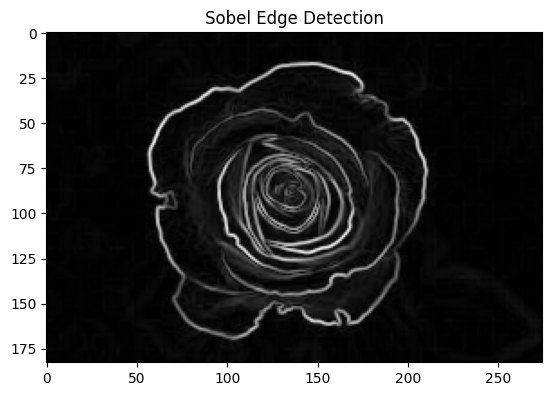

In [8]:
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobelx, sobely)

plt.imshow(sobel_combined, cmap='gray'), plt.title('Sobel Edge Detection')
plt.show()

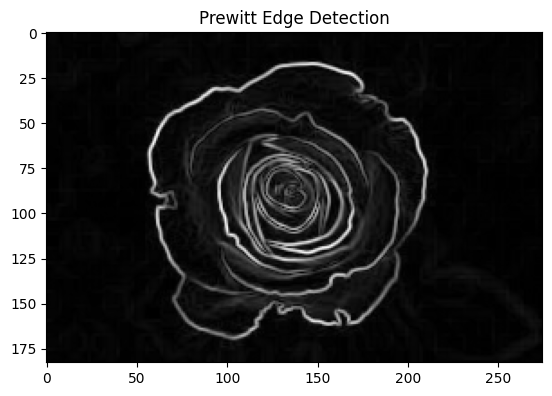

In [14]:
prewittx = cv2.filter2D(img, cv2.CV_32F, np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]))
prewitty = cv2.filter2D(img, cv2.CV_32F, np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]))

# Compute the gradient magnitude
prewitt_combined = cv2.magnitude(prewittx, prewitty)

# Display the result
plt.imshow(prewitt_combined, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.show()


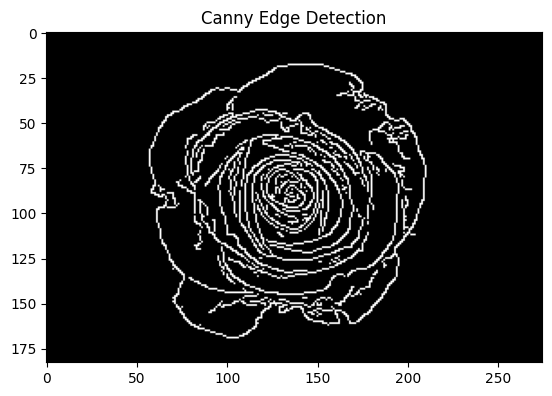

In [10]:
canny_edges = cv2.Canny(img, 50, 150)
plt.imshow(canny_edges, cmap='gray'), plt.title('Canny Edge Detection')
plt.show()

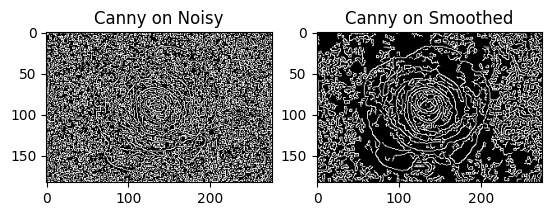

In [11]:
noisy_img = img + np.random.normal(0, 25, img.shape).astype(np.uint8)
canny_edges_noisy = cv2.Canny(noisy_img, 50, 150)

smoothed = cv2.GaussianBlur(noisy_img, (5, 5), 0)
canny_edges_smooth = cv2.Canny(smoothed, 50, 150)

plt.subplot(1, 2, 1), plt.imshow(canny_edges_noisy, cmap='gray'), plt.title('Canny on Noisy')
plt.subplot(1, 2, 2), plt.imshow(canny_edges_smooth, cmap='gray'), plt.title('Canny on Smoothed')
plt.show()

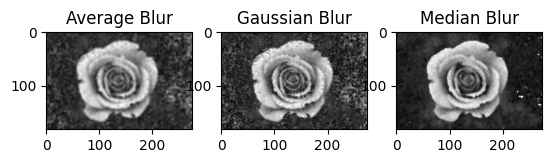

In [12]:
avg_blur = cv2.blur(noisy_img, (5, 5))
gaussian_blur = cv2.GaussianBlur(noisy_img, (5, 5), 0)
median_blur = cv2.medianBlur(noisy_img, 5)

plt.subplot(1, 3, 1), plt.imshow(avg_blur, cmap='gray'), plt.title('Average Blur')
plt.subplot(1, 3, 2), plt.imshow(gaussian_blur, cmap='gray'), plt.title('Gaussian Blur')
plt.subplot(1, 3, 3), plt.imshow(median_blur, cmap='gray'), plt.title('Median Blur')
plt.show()


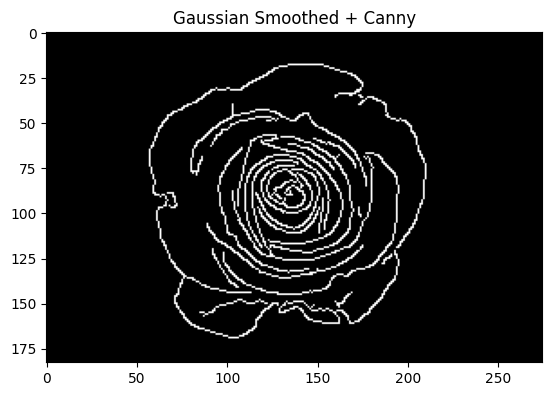

In [13]:
smoothed = cv2.GaussianBlur(img, (5, 5), 0)
edges = cv2.Canny(smoothed, 50, 150)
plt.imshow(edges, cmap='gray'), plt.title('Gaussian Smoothed + Canny')
plt.show()
